# PISA Data Exploration
## by Ken Norton

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

My questions:

* Does the age when a child begins learning affect academic performance?
* How do political freedom and civil rights relate to academic performance?
* Does economic, social, and cultural status (ESCS) relate to academic performance?

## Preliminary Wrangling

## Load Data

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Plot styles
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

# We have a lot of columns in our data set
pd.set_option('display.max_columns', 650)
pd.set_option('display.max_rows', 650)
pd.set_option('display.width', 1000)

In [3]:
# Using low_memory=False here to suppress the dtype errors
# per: https://stackoverflow.com/a/40585000
df = pd.read_csv('data/pisa2012.csv', low_memory=False, encoding='latin1')

In [4]:
# Import the freedom scores
df_free = pd.read_csv('data/Freedom_in_the_World_2012.csv')

## Assessment

In [5]:
# High level inspection
df.shape

(485490, 636)

In [6]:
df.sample(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [7]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,ST21Q01,ST26Q15,ST26Q16,ST26Q17,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC05Q01,IC06Q01,IC07Q01,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,CLCUSE301,CLCUSE302,DEFFORT,AGE,GRADE,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,HEDRES,HERITCUL,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,LANGCOMM,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MMINS,MTSUP,OPENPS,OUTHOURS,PARED,PERSEV,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBNORM,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1MACC,PV2MACC,PV3MACC,PV4MACC,PV5MACC,PV1MACQ,PV2MACQ,PV3MACQ,PV4MACQ,PV5MACQ,PV1MACS,PV2MACS,PV3MACS,PV4MACS,PV5MACS,PV1MACU,PV2MACU,PV3MACU,PV4MACU,PV5MACU,PV1MAPE,PV2MAPE,PV3MAPE,PV4MAPE,PV5MAPE,PV1MAPF,PV2MAPF,PV3MAPF,PV4MAPF,PV5MAPF,PV1MAPI,PV2MAPI,PV3MAPI,PV4MAPI,PV5MAPI,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,W_FSTR10,W_FSTR11,W_FSTR12,W_FSTR13,W_FSTR14,W_FSTR15,W_FSTR16,W_FSTR17,W_FSTR18,W_FSTR19,W_FSTR20,W_FSTR21,W_FSTR22,W_FSTR23,W_FSTR24,W_FSTR25,W_FSTR26,W_FSTR27,W_FSTR28,W_FSTR29,W_FSTR30,W_FSTR31,W_FSTR32,W_FSTR33,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,32728.000000,4.854900e+05,4.854900e+05,4.854900e+05,301367.000000,269808.000000,283813.000000,279657.000000,289502.000000,289428.000000,299618.000000,298601.000000,291943.000000,296878.000000,298339.000000,289068.000000,255665.000000,294163.000000,311290.000000,310906.000000,310321.00000,310655.000000,310449.000000,309969.000000,310366.000000,310156.000000,485490.000000,485490.000000,485490.000000,169730.000000,169765.000000,169779.000000,169783.000000,169784.000000,169798.000000,169796.000000,169786.000000,169799.000000,169655.000000,169641.00000,169656.000000,169716.000000,169716.000000,169725.000000,169643.000000,169640.000000,169636.000000,485490.000000,485490.000000,485490.000000,485374.000000,484617.000000,314764.000000,312584.000000,311675.000000,313399.000000,416150.000000,364814.000000,312708.000000,314557.000000,13380.000000,471357.000000,314777.000000,295195.000000,473648.000000,313279.000000,312602.000000,314448.000000,310304.000000,308442.000000,429058.000000,477772.000000,13496.000000,450621.000000,479807.000000,293194.000000,13598.000000,289744.000000,290490.000000,298740.000000,477754.000000,297995.000000,165792.000000,83305.000000,83305.000000,316322.000000,316708.000000,44094.000000,43137.000000,282866.000000,313847.000000,315948.000000,301360.000000,314501.000000,283303.000000,313599.000000,312766.000000,308799.000000,473091.000000,313172.000000,314607.000000,270914.000000,313860.000000,316323.000000,314678.000000,315114.000000,315519.000000,316371.000000,297074.000000,290260.000000,292585.000000,479597.00000,306835.000000,306487.000000,307640.000

In [8]:
df_free.sample(5)

,country,political_rights,civil_liberties,freedom_status
9,China (Shanghai),7,6,NF
3,Austria,1,1,F
35,Macao-China,7,6,NF
25,Ireland,1,1,F
15,Denmark,1,1,F


### What is the structure of your dataset?

The set has **485,490 rows** representing individual students in the survey. There are **636 columns** that contain data about lots of different factors about the student, there they live, their economic, social, and cultural status, their attitudes about learning, and their performance on a panel of math, reading, and science assessments. Many of the qualitative columns contain contain string values that represent a scale (e.g. "Never" -> "Every day"). There's a wealth of data here!

### What is/are the main feature(s) of interest in your dataset?

The features of interest from the PISA dataset to me are primarily:

* `NC` - country code (there is another code called CNT but that seems to include sub-regions, such as Florida and Massachusetts)
* `ST04Q01` - the student's gender (Male or Female)
* `PV1MATH-PV5MATH` - plausible values that represent scores on the mathematic section
* `PV1READ-PV5READ` - plausible values that represent scores on the reading section
* `PV1SCIE-PV5SCIE` - plausible values that represent scores on the science section
* `EC06Q01` - the year the student began learning, expressed in string ranges
* `ESCS` - a single index that combines several economic, social and cultural status factors. It's expressed as +/- standard deviations from the mean of population (where 0 = mean)

And from the _Freedom House_ dataset I'll be using:

* `political_rights` - degree of a country's political freedom, scale of 1=most free to 7=least free
* `civil_liberties` - degree of a country's civil liberties, scale of 1=most free to 7=least free
* `freedom_status` - a single overall rating of the country's freedom, F, PF, and NF stand for Free, Partly Free, and Not Free

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For my assessment, I'll be using `ESCS` to represent student economic, social, and cultural status. I'll be creating new values to average each of the 5 math, reading, and science tests into single scores for each subject. I'll also be looking at these factors against the _Freedom House_ freedom scores.

## Cleaning

In [9]:
# Make a copy for cleaning
df_clean = df.copy()

I noticed several of the text values have leading or trailing spaces.

In [10]:
# Trim trailing/leading spaces
df_clean = df_clean.apply(lambda x: x.str.strip()
                          if x.dtype == "object" else x)

### Freedom House data

Now I'm going to join the Freedom House data

In [11]:
# Join the Freedom House data, drop the dupe country column
df_clean = pd.merge(df_clean, df_free, left_on='NC', right_on='country')
df_clean.drop(columns=['country'], inplace=True)


In [12]:
# Test to make sure the join worked
# Expect: PF, NF, or F with no NaN
df_clean.freedom_status.unique()

array(['PF', 'NF', 'F'], dtype=object)

In [13]:
# Convert the freedom_status field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=['NF', 'PF', 'F'])

df_clean['freedom_status'] = df_clean['freedom_status'].astype(ordered_var)


### Overall Math/Reading/Science Scores

From the [PISA Data Visualization Contest instructions](https://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm): "Pupil performance in mathematics, reading and science is coded by plausible values. You can find them in columns: `PV1MATH-PV5MATH` (for math), `PV1READ-PV5READ` (for reading) and `PV1SCIE-PV5SCIE` (for science). For given area all five values PV1-PV5 are just independent estimations of the student performance in given area. For exploration it is fine to use only PV1."

Based on this, I've decided to use the average of each of the five scores in each category as an overall "literacy" value.

In [14]:
# Each score is scaled to a mean of 500 and a standard deviation of 100

# Average of the five MATH assessment scores
df_clean['math_literacy'] = ((df_clean['PV1MATH'] + df_clean['PV2MATH'] +
                             df_clean['PV3MATH'] + df_clean['PV4MATH'] +
                             df_clean['PV5MATH']) / 5)

# Average of the five READING assessment scores
df_clean['read_literacy'] = ((df_clean['PV1READ'] + df_clean['PV2READ'] +
                             df_clean['PV3READ'] + df_clean['PV4READ'] +
                             df_clean['PV5READ']) / 5)

# Average of the five SCIENCE assessment scores
df_clean['sci_literacy'] = ((df_clean['PV1SCIE'] + df_clean['PV2SCIE'] +
                             df_clean['PV3SCIE'] + df_clean['PV4SCIE'] +
                             df_clean['PV5SCIE']) / 5)

### Age Started Learning

In [15]:
# EC06Q01 = age started learning
df_clean.EC06Q01.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [16]:
# Convert the EC06Q01 field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=[
                                                '0 to 3 years', 
                                                '4 to 6 years',
                                                '7 to 9 years',
                                                '10 to 12 years',
                                                '13 years or older'
                                            ])

df_clean['EC06Q01'] = df_clean['EC06Q01'].astype(ordered_var)


In [17]:
df_clean['EC06Q01'].unique()

[NaN, 0 to 3 years, 4 to 6 years, 10 to 12 years, 7 to 9 years, 13 years or older]
Categories (5, object): [0 to 3 years < 4 to 6 years < 7 to 9 years < 10 to 12 years < 13 years or older]

### Remove unused columns

Our dataframe is massive which can make it unwieldly to analyze. We're going to reduce it to only those columns we'll be using in our analysis.

In [18]:
df_clean = df_clean[[
    'STIDSTD', 'NC', 'ESCS', 'EC06Q01', 'ST04Q01', 'math_literacy', 'read_literacy',
    'sci_literacy', 'civil_liberties', 'political_rights', 'freedom_status'
]]


In [19]:
df_clean.rename(columns={
    'STIDSTD': 'student_id',
    'NC': 'country',
    'EC06Q01': 'age_start_learn',
    'ST04Q01': 'gender'
},
              inplace=True)


In [20]:
df_clean.head()

,student_id,country,ESCS,age_start_learn,gender,math_literacy,read_literacy,sci_literacy,civil_liberties,political_rights,freedom_status
0,1,Albania,NaN,NaN,Female,366.18634,261.01424,371.91348,3,3,PF
1,2,Albania,NaN,NaN,Female,470.56396,384.68832,478.12382,3,3,PF
2,3,Albania,NaN,NaN,Female,505.53824,405.18154,486.60946,3,3,PF
3,4,Albania,NaN,NaN,Female,449.45476,477.46376,453.97240,3,3,PF
4,5,Albania,NaN,NaN,Female,385.50398,256.01010,367.15778,3,3,PF


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 11 columns):
student_id          485490 non-null int64
country             485490 non-null object
ESCS                473648 non-null float64
age_start_learn     40345 non-null category
gender              485490 non-null object
math_literacy       485490 non-null float64
read_literacy       485490 non-null float64
sci_literacy        485490 non-null float64
civil_liberties     485490 non-null int64
political_rights    485490 non-null int64
freedom_status      485490 non-null category
dtypes: category(2), float64(4), int64(3), object(2)
memory usage: 38.0+ MB


In [22]:
# Save a copy of the cleaned dataframe
df_clean.to_csv('data/pisa2012_clean.csv')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Which countries did the students come from?

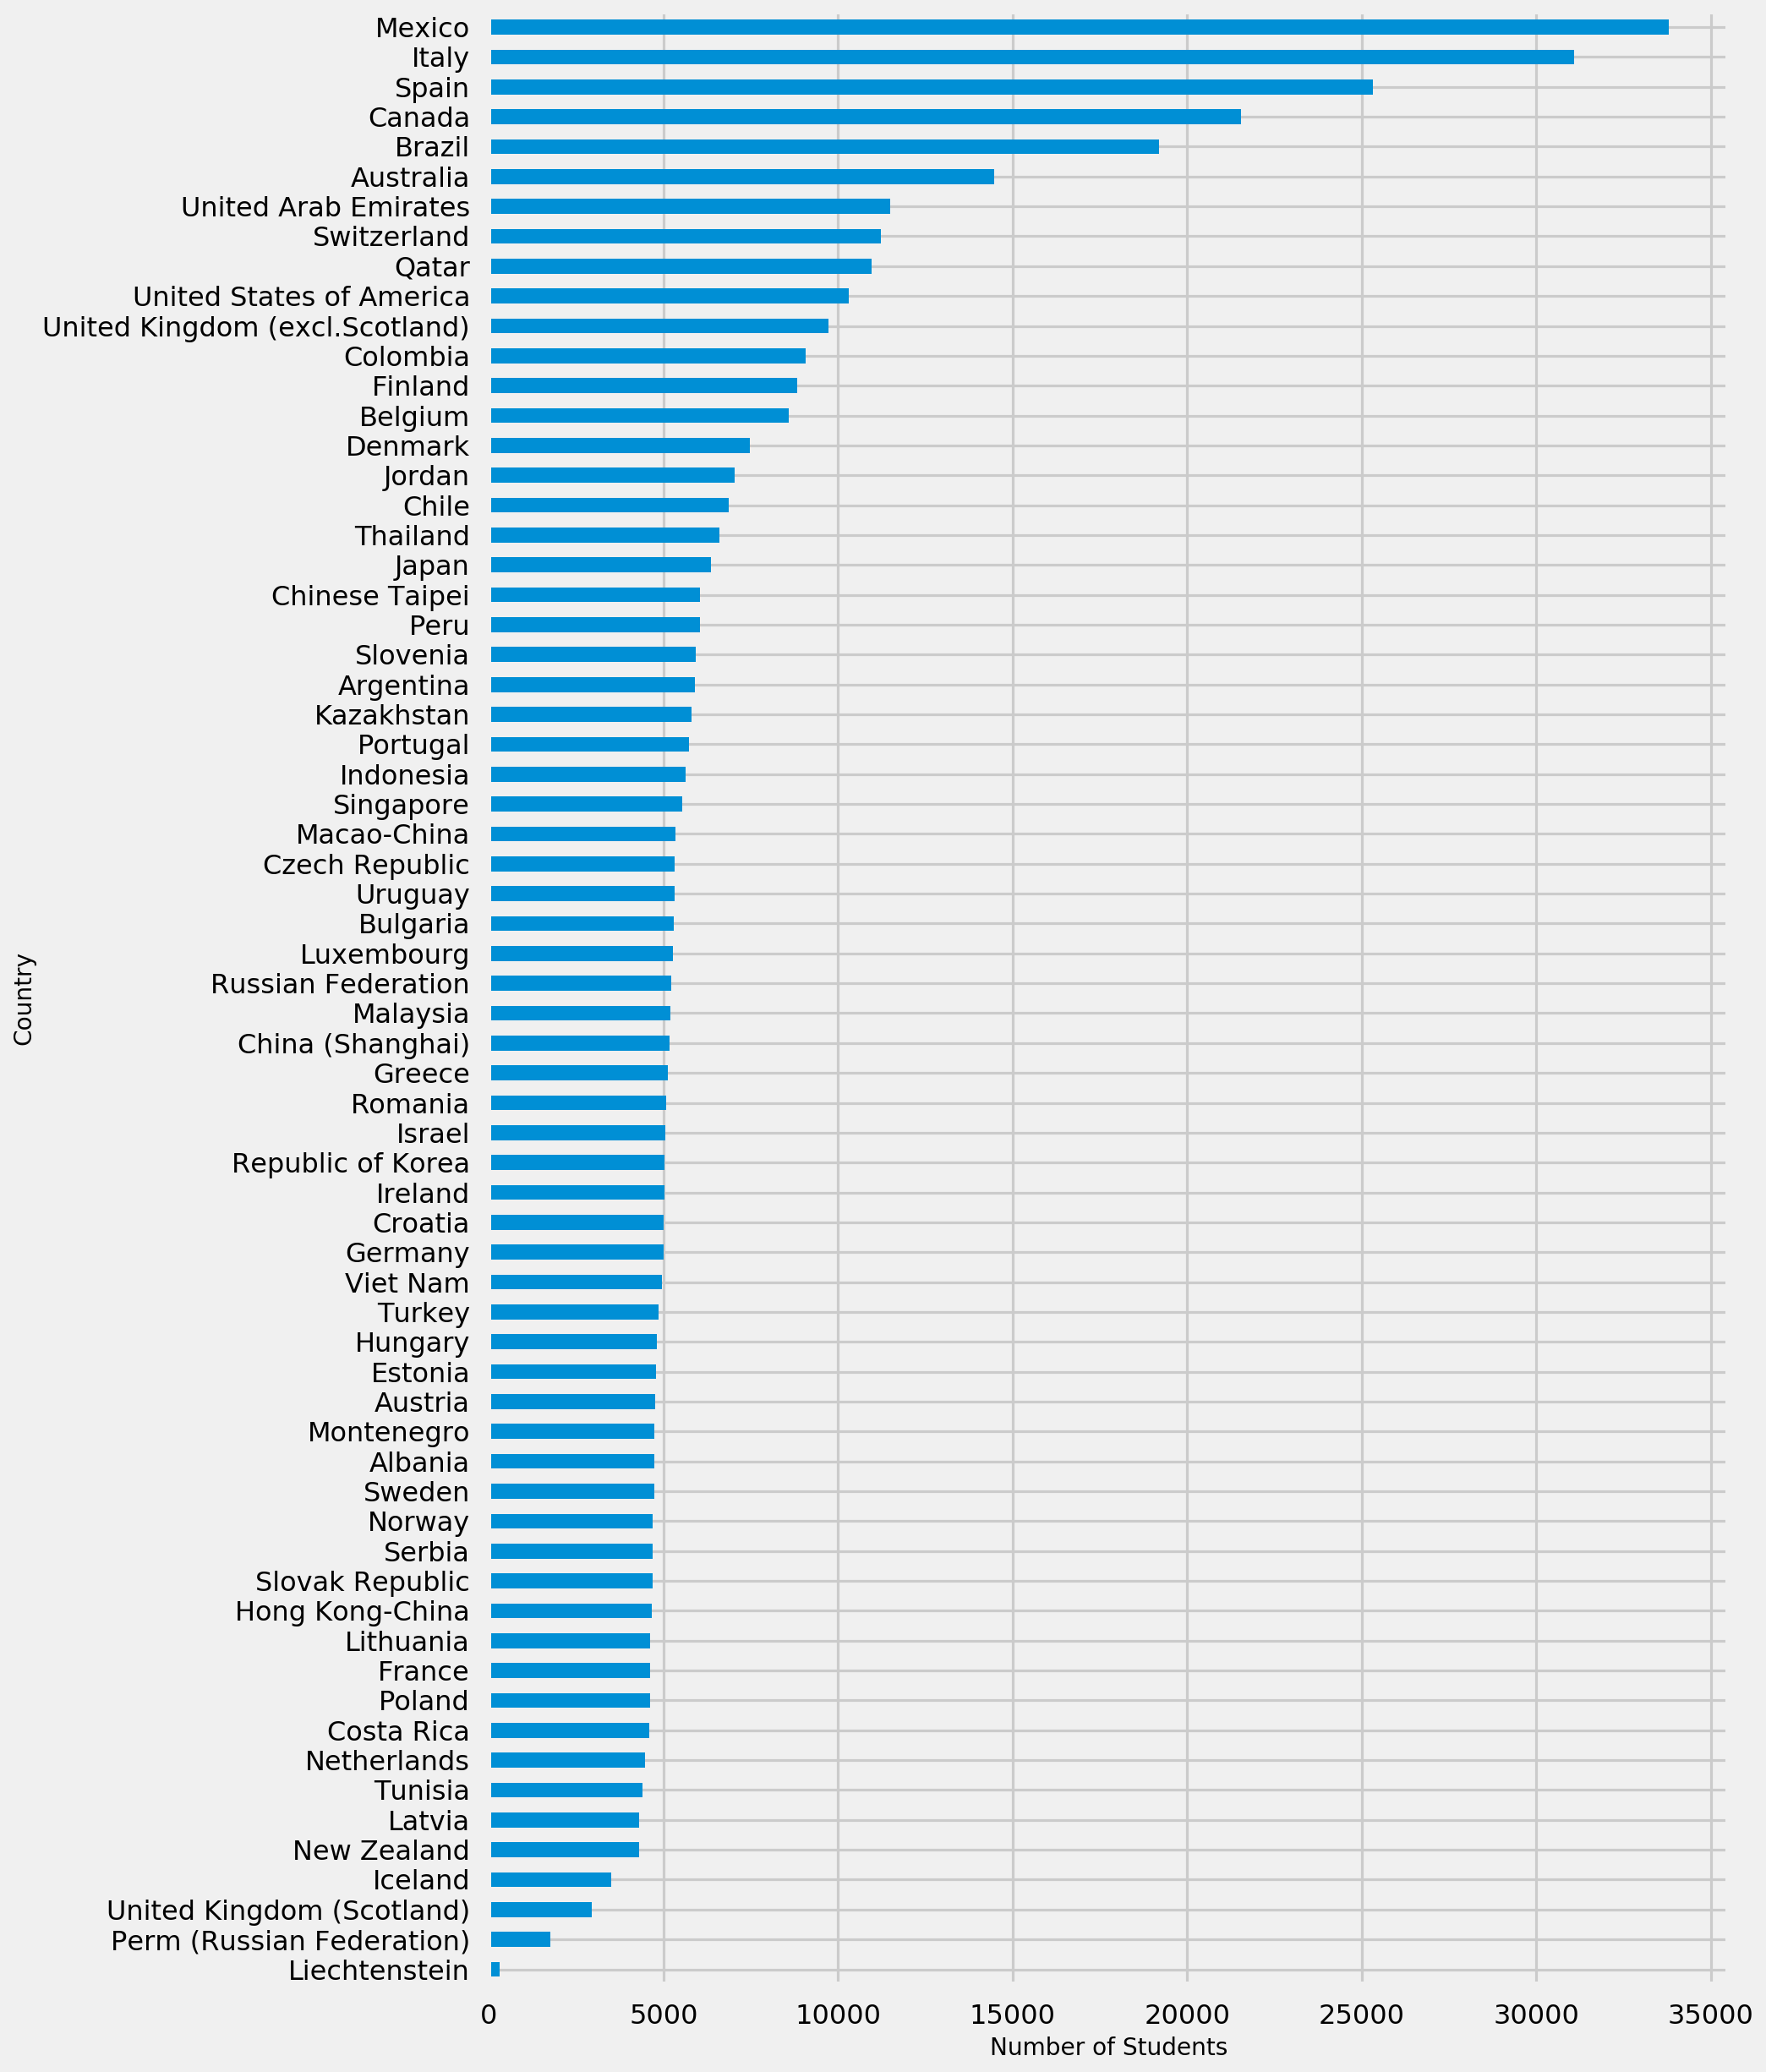

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 20)
df_clean['country'].value_counts(ascending=True).plot(kind="barh")
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of Students", fontsize=14)
plt.show()
fig.savefig("images/students-by-country.png")

### Age Started Learning

In [24]:
df_clean['age_start_learn'].value_counts(normalize=True) * 100

0 to 3 years         64.617673
4 to 6 years         22.820672
7 to 9 years          7.420994
10 to 12 years        3.160243
13 years or older     1.980419
Name: age_start_learn, dtype: float64

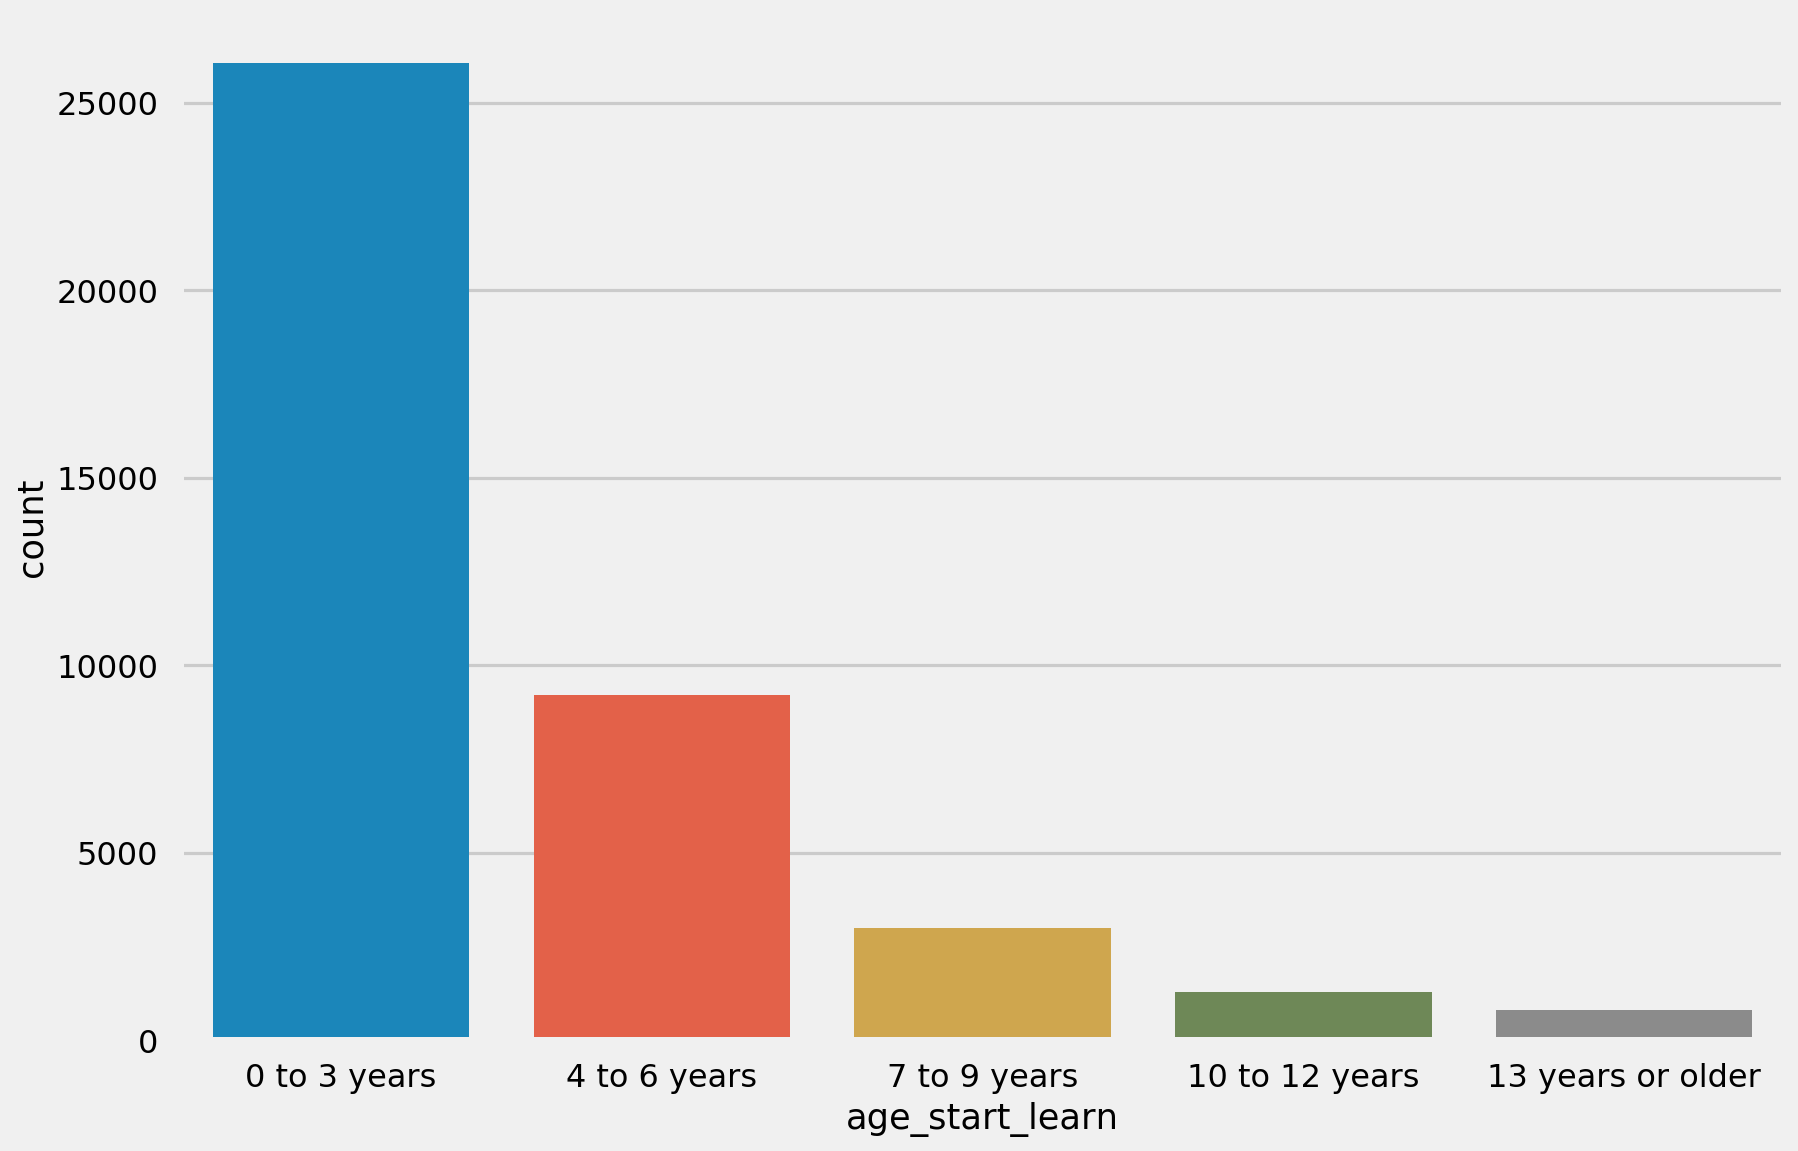

In [25]:
sns.countplot(data=df_clean, x='age_start_learn')
plt.show()

### Freedom House data

### Overall Math/Reading/Science Scores

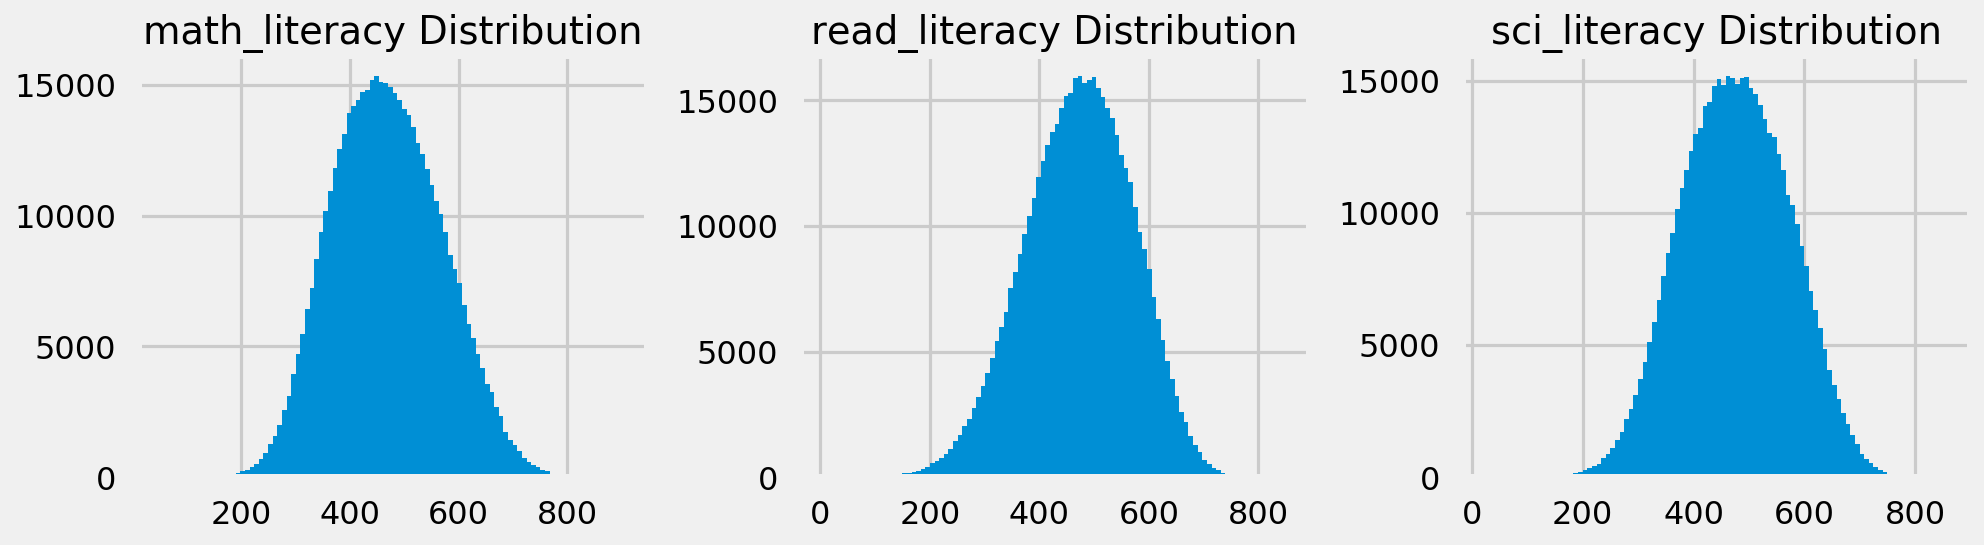

In [27]:
# Function for plotting multiple histograms from here:
# https://stackoverflow.com/questions/29530355/plotting- \
# multiple-histograms-in-grid
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=100, ax=ax)
        ax.set_title(var_name + " Distribution")
    fig.set_size_inches(14, 4)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(df_clean, 
                ['math_literacy', 
                 'read_literacy', 
                 'sci_literacy'], 
                1, 3)


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Relationship between Math Literacy and Civil Liberties

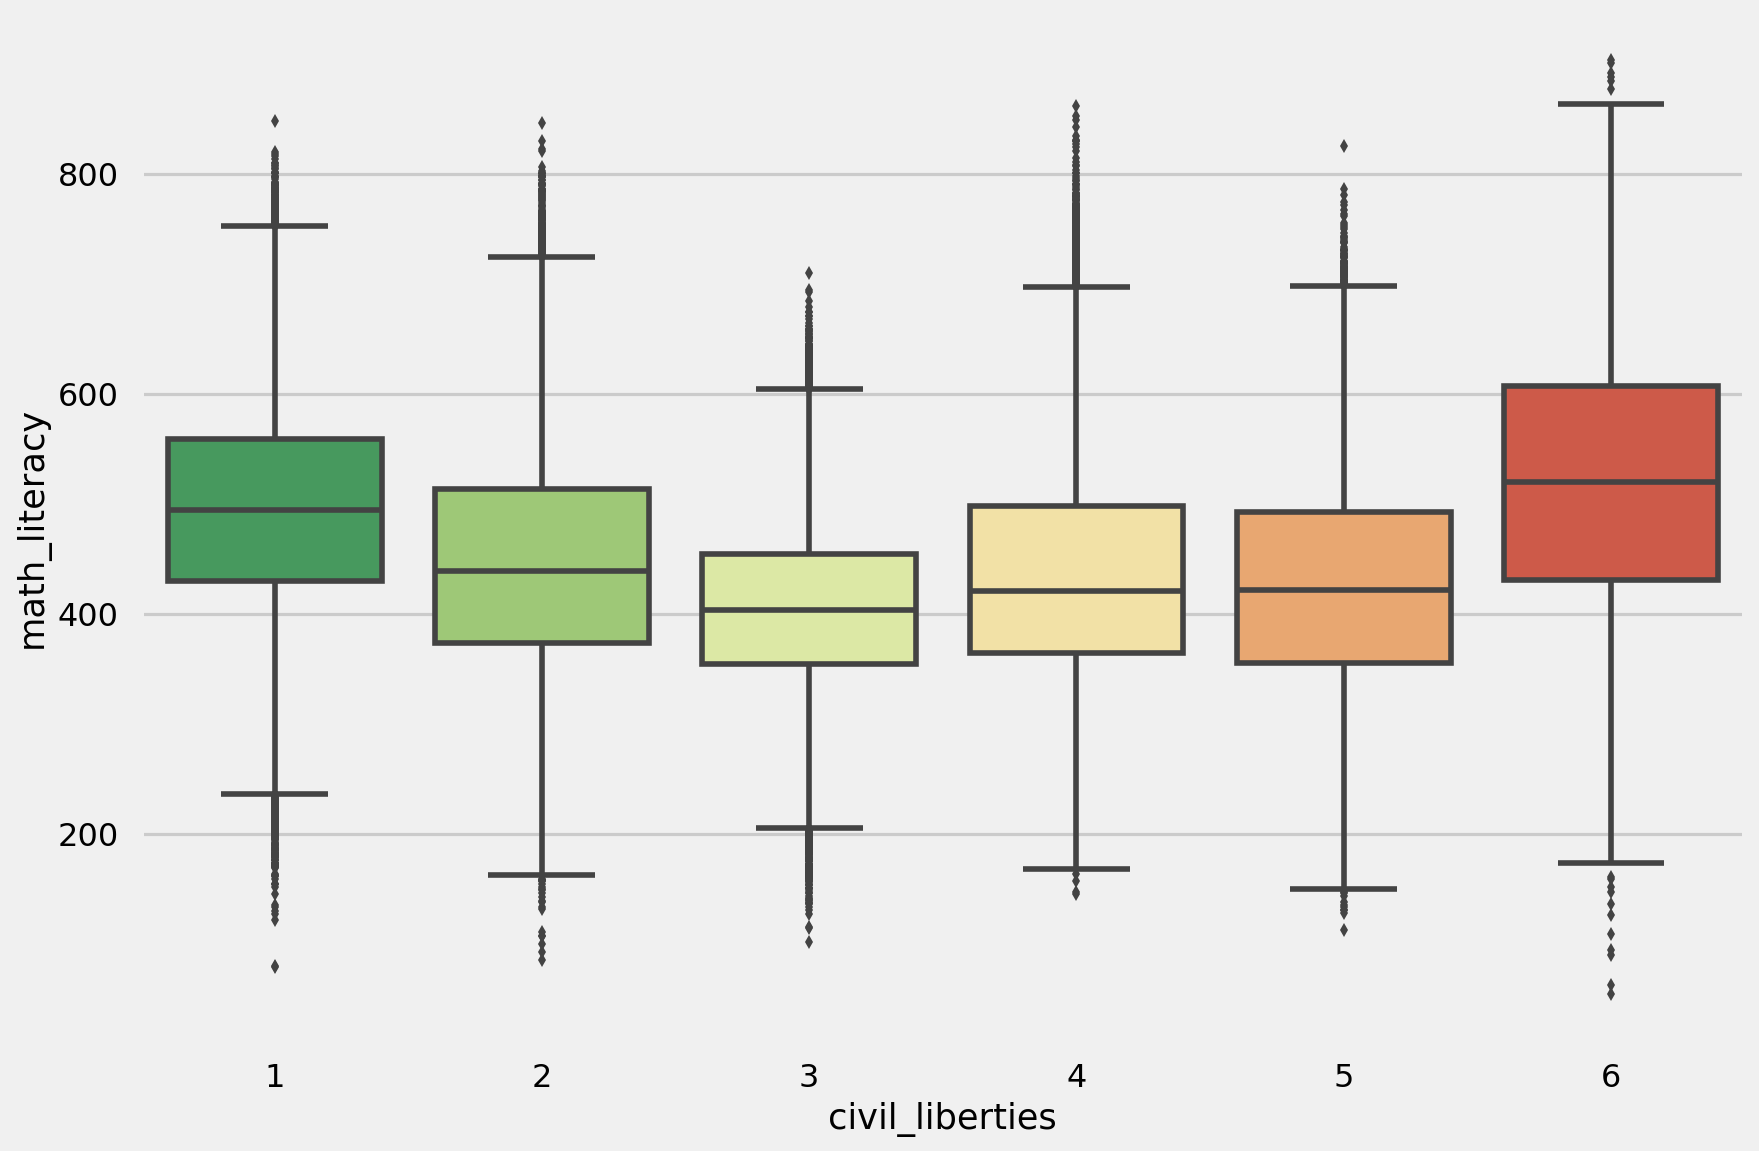

In [28]:
sns.boxplot(data=df_clean,
            x='civil_liberties',
            y='math_literacy',
            palette='RdYlGn_r')
plt.show()


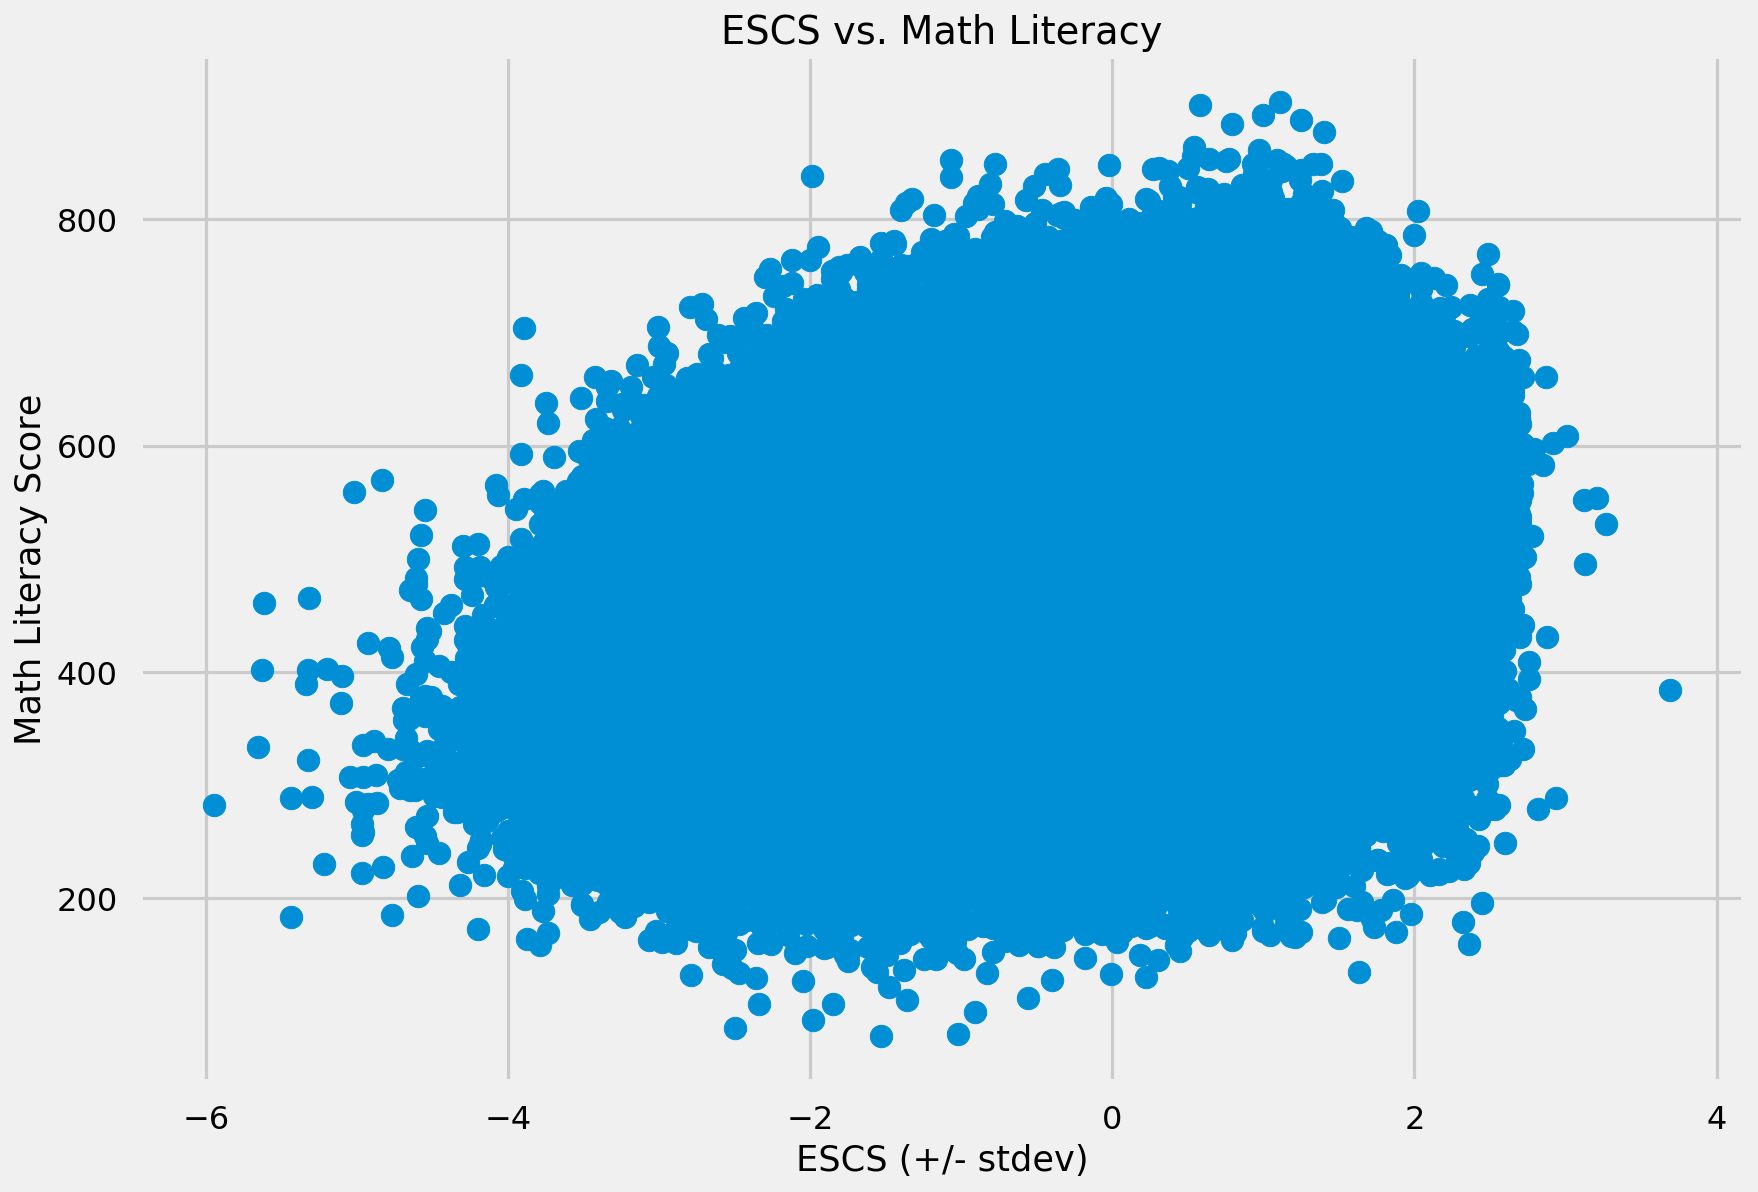

In [29]:
x = df_clean['ESCS']
y = df_clean['math_literacy']
plt.scatter(x, y)
plt.title("ESCS vs. Math Literacy")
plt.xlabel("ESCS (+/- stdev)")
plt.ylabel("Math Literacy Score")
plt.show()

In [30]:
df_clean['ESCS'].corr(df_clean['math_literacy'])

0.41056996653744376

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Relationship between Gender, Age Started Learning, and Math Literacy

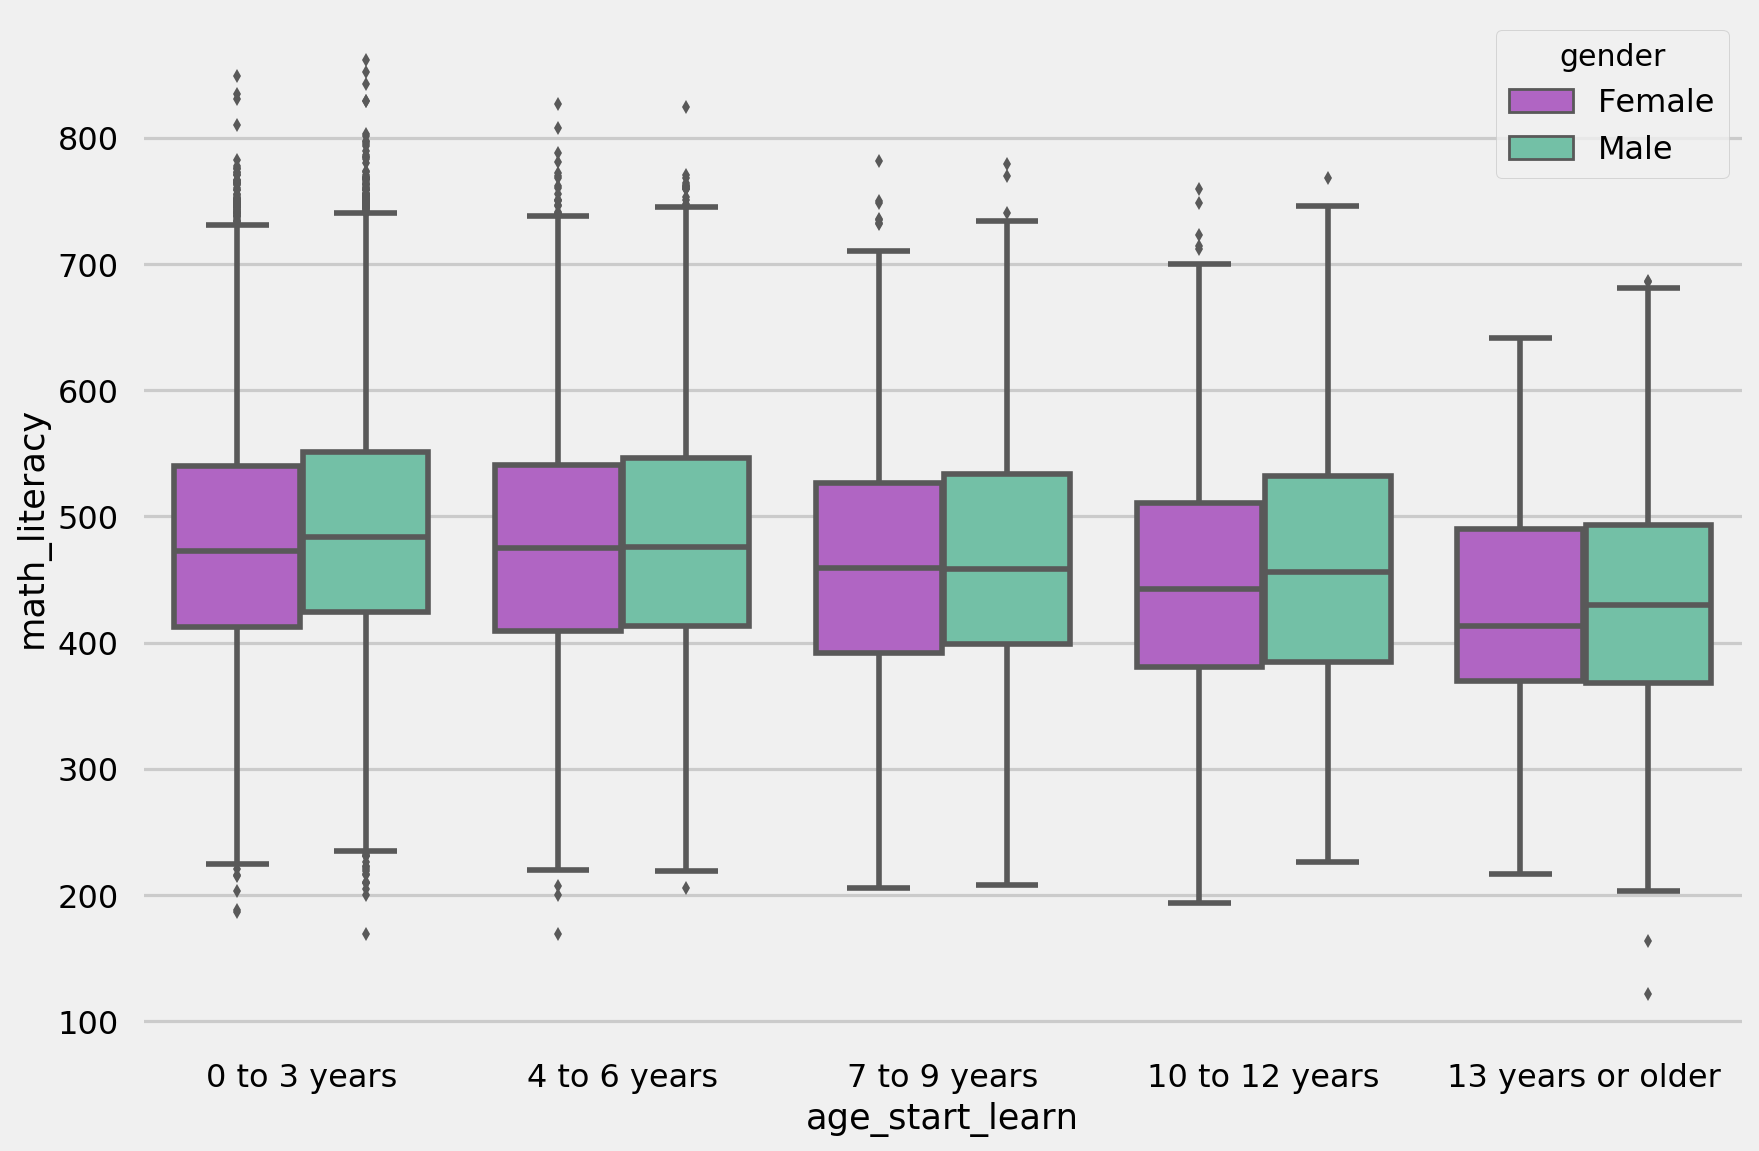

In [31]:
sns.boxplot(data=df_clean,
            x='age_start_learn',
            y='math_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='gender')
plt.show()


### Relationship between Gender, Age Started Learning, and Science Literacy

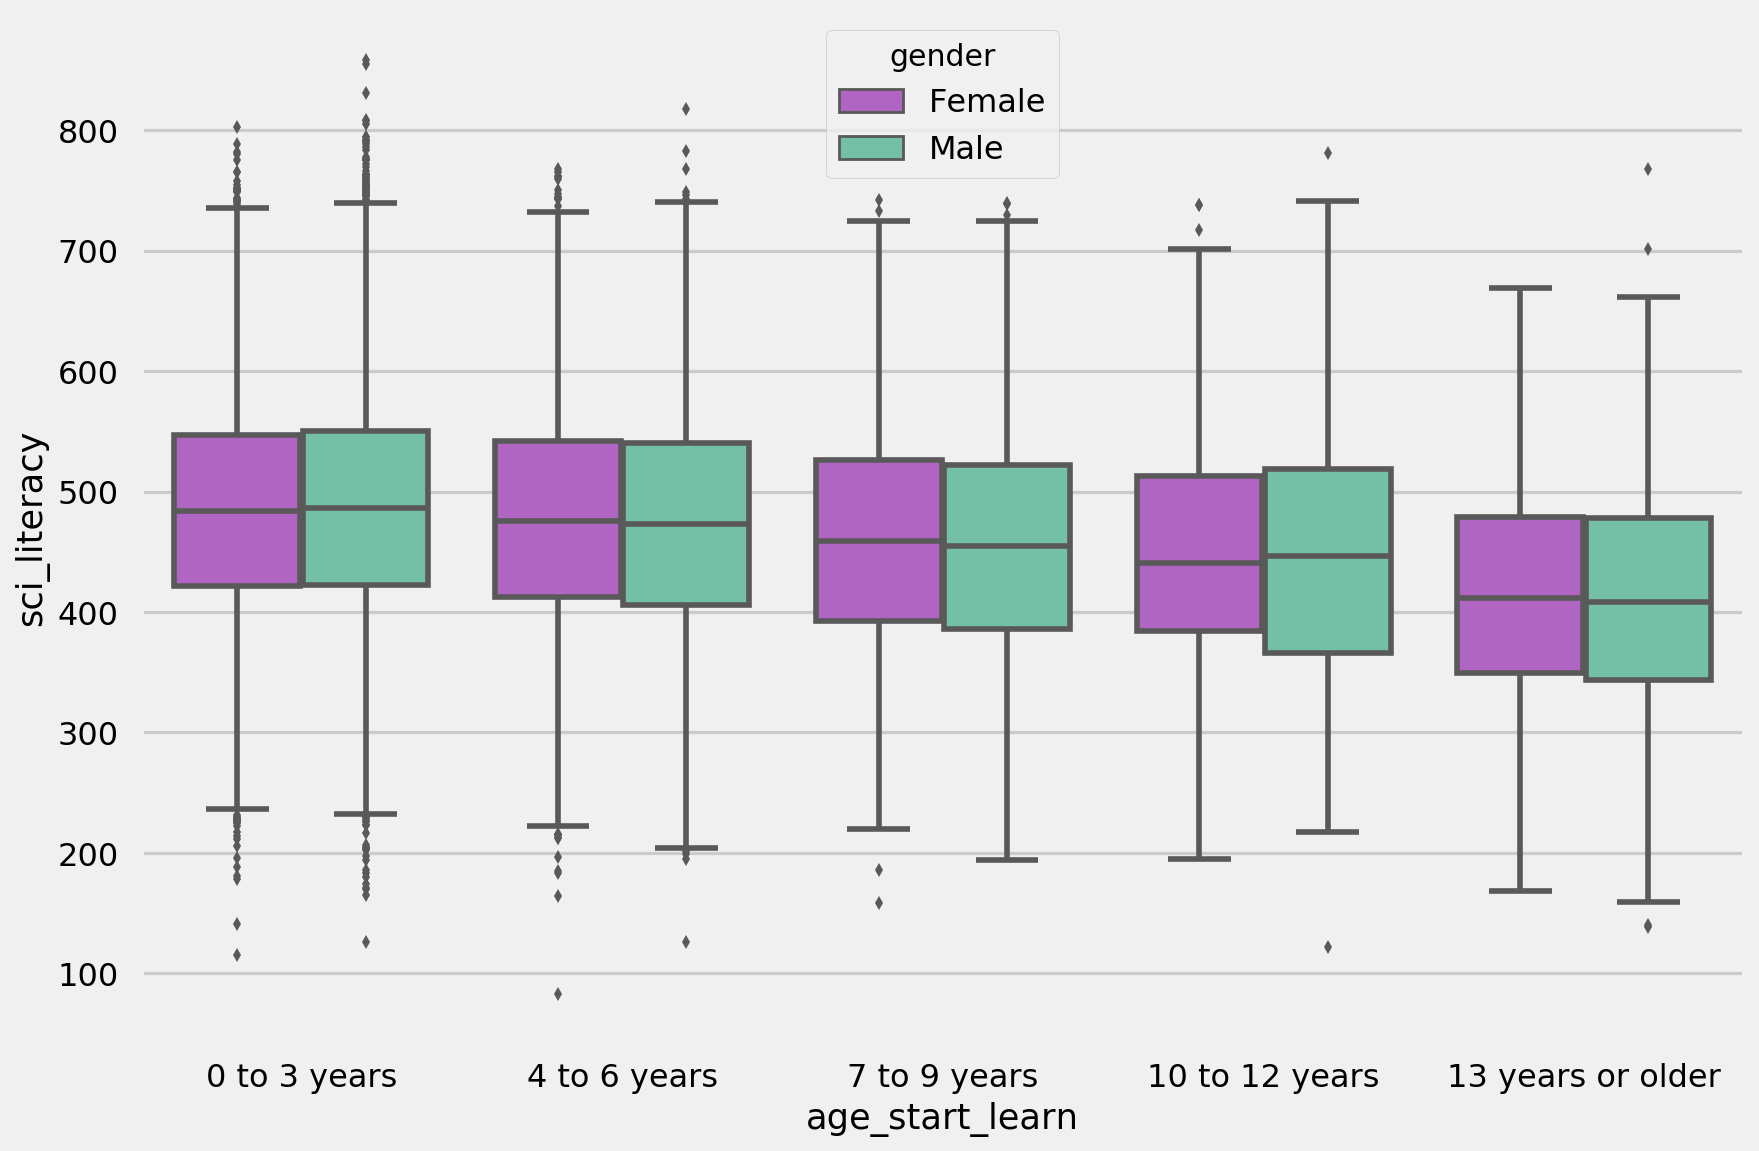

In [32]:
sns.boxplot(data=df_clean,
            x='age_start_learn',
            y='sci_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='gender')
plt.show()


### Relationship between Gender, Age Started Learning, and Reading Literacy

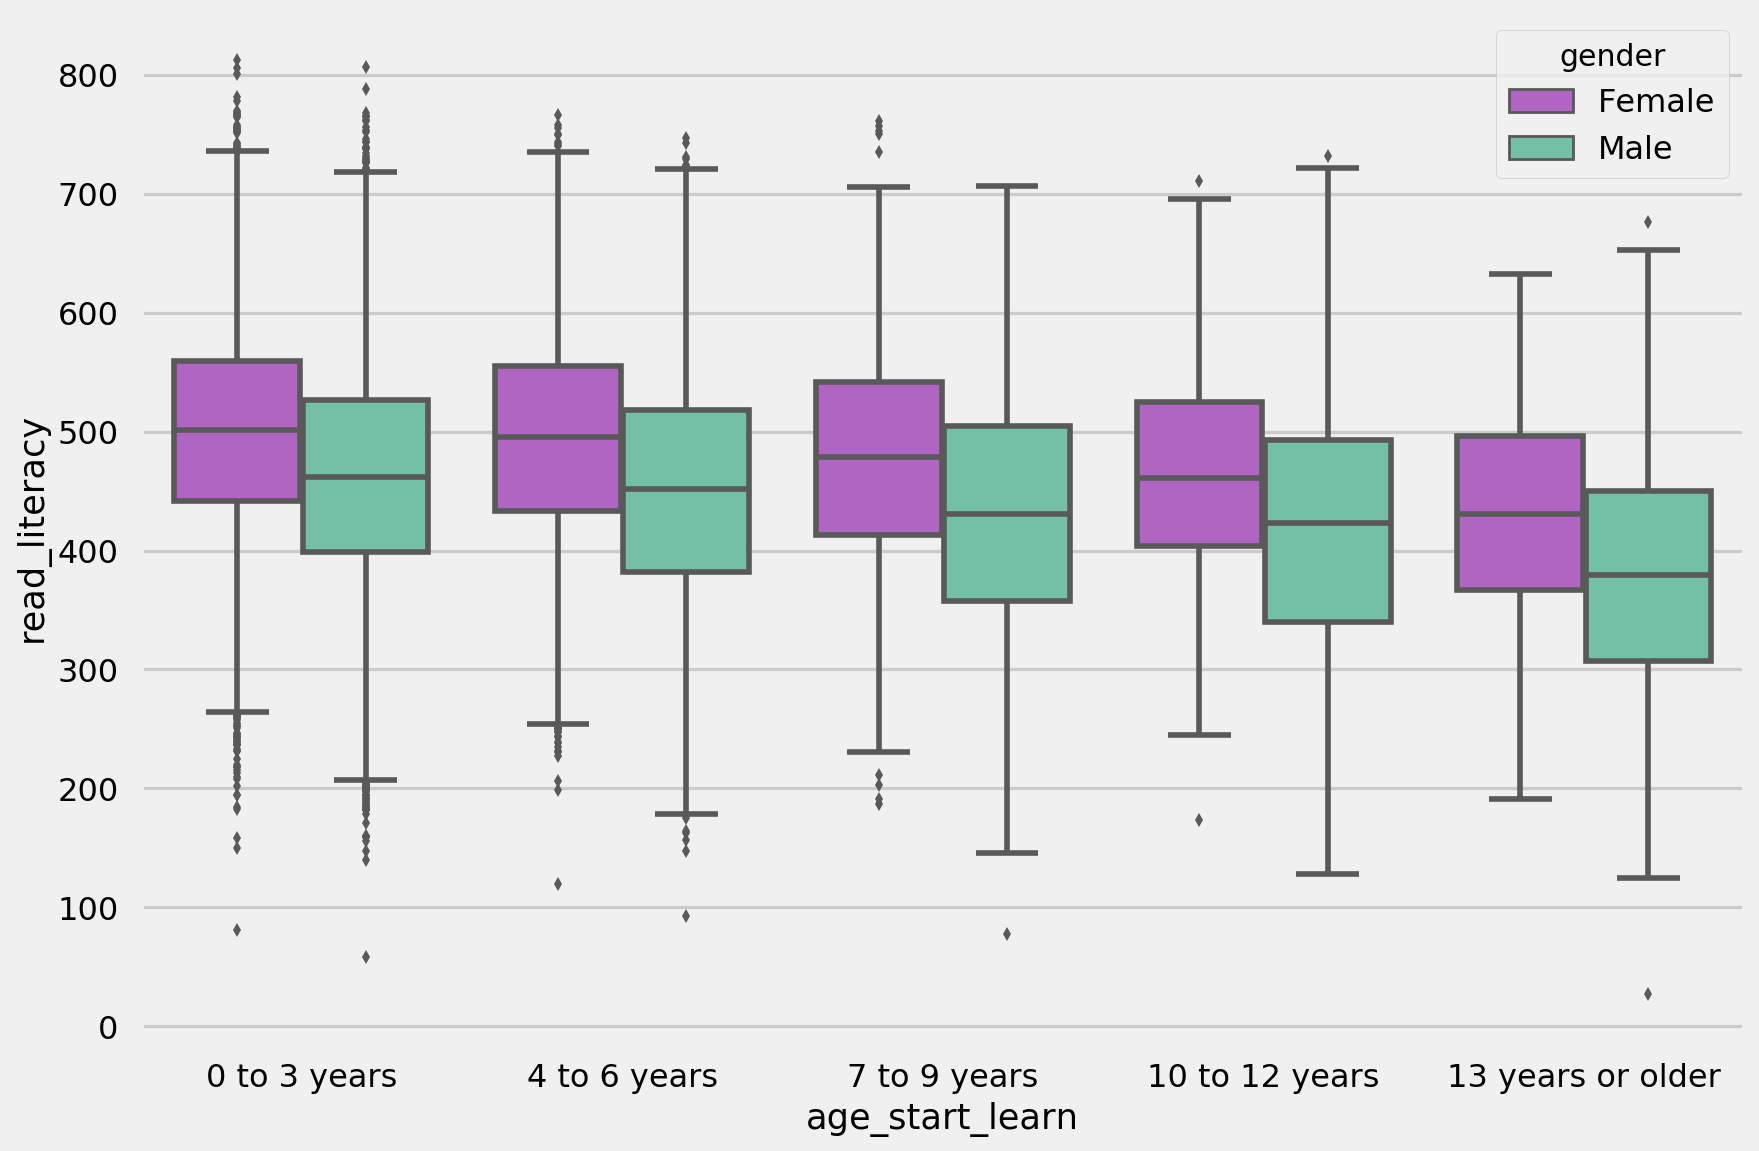

In [33]:
sns.boxplot(data=df_clean,
            x='age_start_learn',
            y='read_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='gender')
plt.show()


### Relationship between Country, Math Literacy, and Civil Liberties

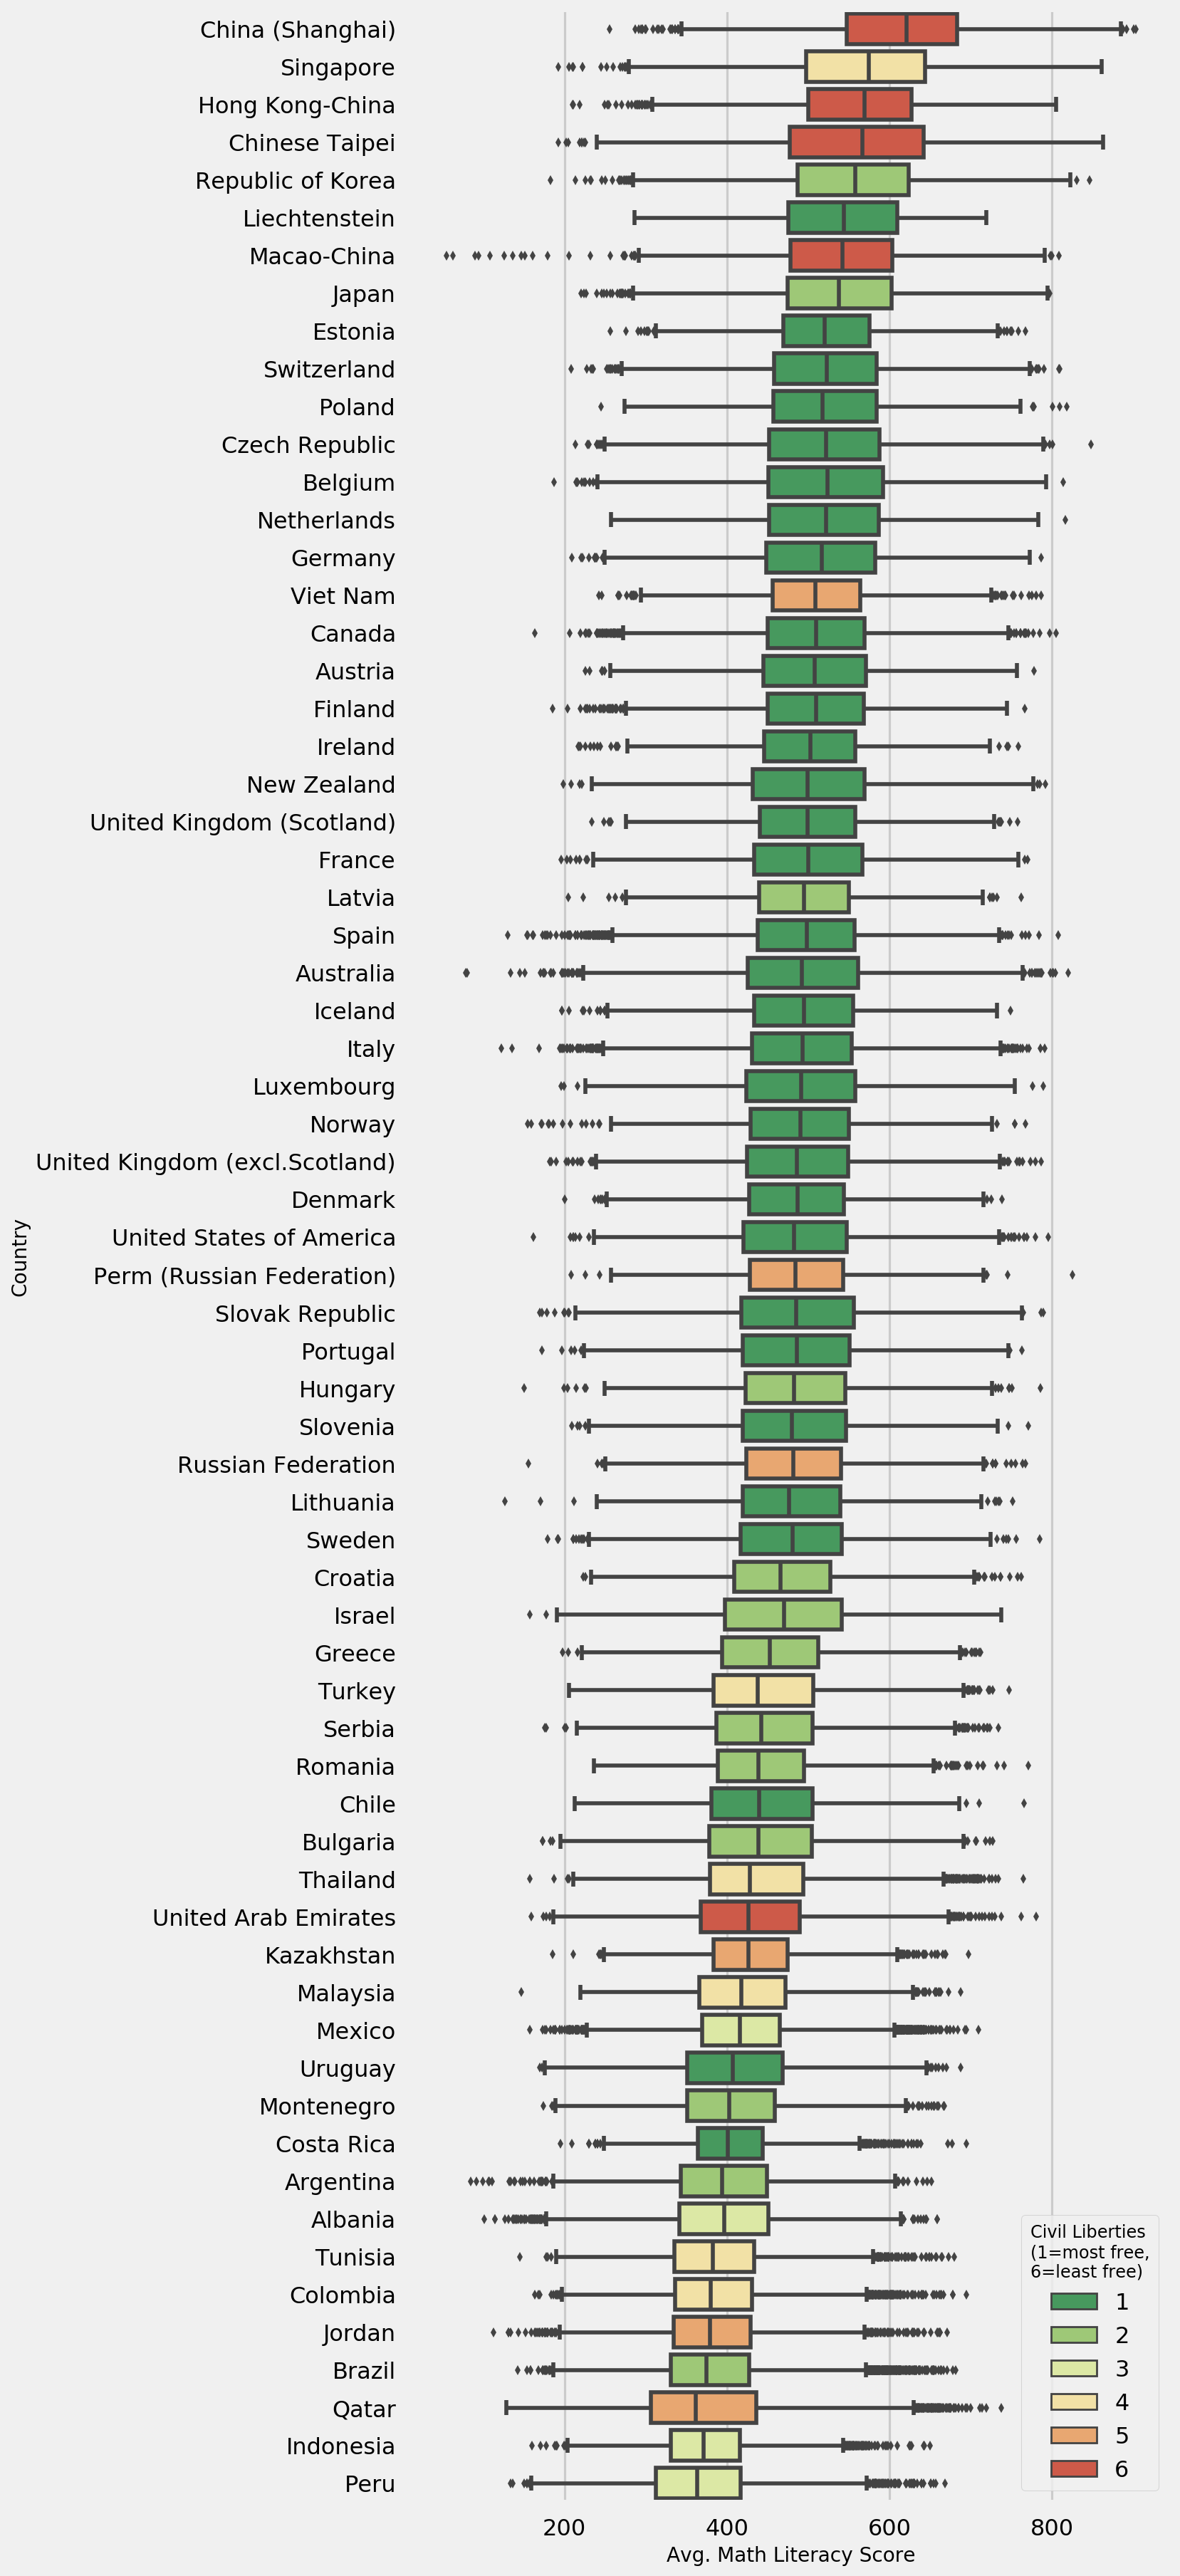

In [34]:
cnt_sort = df_clean.groupby('country')['math_literacy'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='country',
            x='math_literacy',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdYlGn_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Avg. Math Literacy Score", fontsize=14)
legend = ax.legend(loc='best', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()
fig.savefig("images/math-literacy-country.png")


### Relationship between Country, ESCS, and Civil Liberties

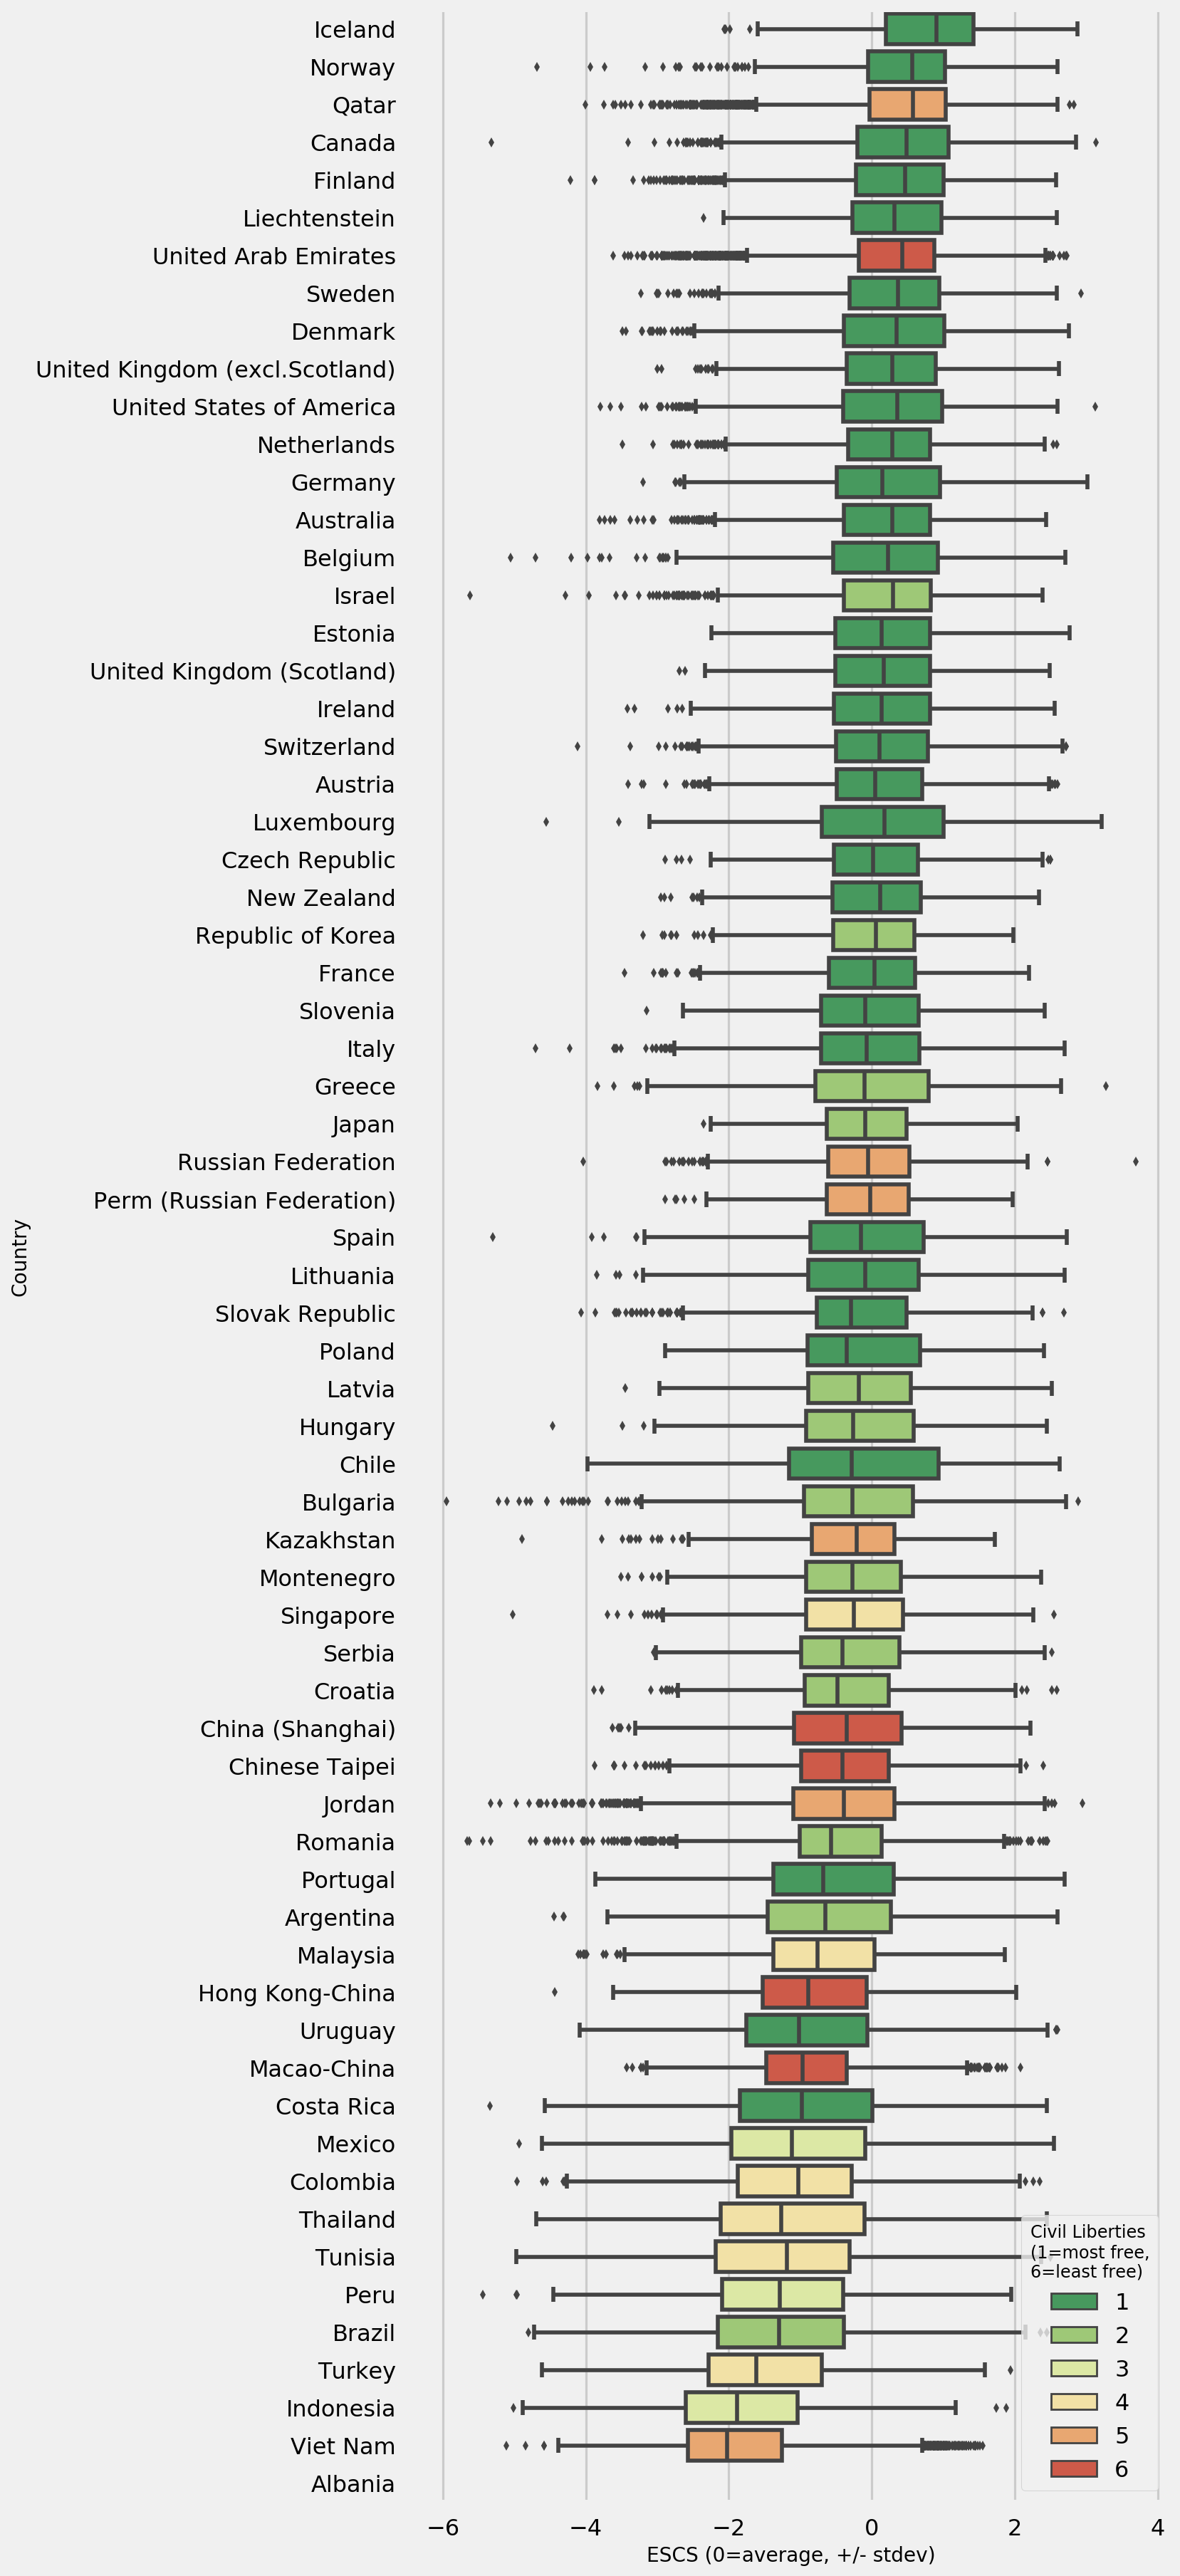

In [35]:
cnt_sort = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdYlGn_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=14)
legend = ax.legend(loc='lower right', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()
fig.savefig("images/escs-country.png")

## Regression Analysis

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [36]:
df_new = df_clean.copy()
df_new = df_new.dropna()

# Add an intercept column
df_new['intercept'] = 1

In [37]:
# Create one-hot encoded columns for Age Started Learning
df_new = df_new.join(pd.get_dummies(df_new['age_start_learn']))

# Create one-hot encoded columns for Gender
df_new = df_new.join(pd.get_dummies(df_new['gender']))

In [38]:
df_new.head()

,student_id,country,ESCS,age_start_learn,gender,math_literacy,read_literacy,sci_literacy,civil_liberties,political_rights,freedom_status,intercept,0 to 3 years,4 to 6 years,7 to 9 years,10 to 12 years,13 years or older,Female,Male
36634,3,Austria,-0.89,0 to 3 years,Male,534.90422,449.87294,500.41028,1,1,F,1,1,0,0,0,0,0,1
36637,6,Austria,-1.11,4 to 6 years,Female,478.11964,474.60424,442.12980,1,1,F,1,0,1,0,0,0,1,0
36638,7,Austria,1.68,0 to 3 years,Male,555.39022,520.92528,561.11528,1,1,F,1,1,0,0,0,0,0,1
36641,10,Austria,0.24,0 to 3 years,Male,610.46112,528.70414,599.34724,1,1,F,1,1,0,0,0,0,0,1
36649,18,Austria,-0.52,0 to 3 years,Male,565.98378,512.26426,532.76764,1,1,F,1,1,0,0,0,0,0,1


### Does Age Started Learning affect performance on mathematics?

Here our null hypothesis is that the mean math performance for any of the age groups a student began learning are equal to the default (ages 4-6). We express that as:

$$\large N_{0}: \mu_{age\_group} = \mu_{4-6y}$$

Our alternative hypothesis is that for individual age groups the mean math performance is not equal to the overall mean math performance:

$$\large N_{1}: \mu_{age\_group} \neq \mu_{4-6y}$$

Our $\alpha$ (alpha) is 0.05.

In [39]:
# Regression analysis of math_literacy scores
# dropping 4 to 6 years age started learning as default
lm = sm.OLS(
    df_new['math_literacy'],
    df_new[[
        'intercept', 'ESCS', '0 to 3 years', 
        '7 to 9 years', '10 to 12 years', '13 years or older'
    ]],
)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          math_literacy   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     730.1
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        14:44:16   Log-Likelihood:            -2.3627e+05
No. Observations:               39905   AIC:                         4.725e+05
Df Residuals:                   39899   BIC:                         4.726e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           488.0640      0.954    511.754      0.000     486.195     489.933
ESCS                 26.8300      0.473     56.687      0.000      25.902      27.758
0 to 3 years         -3.5298      1.108     -3.186      0.001      -5.701      -1.358
7 to 9 years        -10.8458      1.911     -5.677      0.000     -14.590      -7.101
10 to 12 years      -20.4210      2.715     -7.522      0.000     -25.742     -15.100
13 years or older   -44.7139      3.356    -13.325      0.000     -51.291     -38.137
==============================================================================
Omnibus:                      498.509   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.259
Skew:                           0.279   Prob(JB):                    4.77e-113
Kurtosis:                       2.988   Cond. No.                         9.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above we can reject the null hypothesis: all of the age groups perform worse in mathematics when compared to 4 to 6 years. This performance penalty increases as the age a student began learning increases. Students who begin learning later than the ages of 4 to 6 years perform worse on the math literacy tests. Our p-value for all of the tested age groups is < 0.05.